Build the Linear regression model for:
   a) Wine quality
   b) Select your own data

For both datasets:
1) Calculate all the coeficients

2) Calculate p-values. 
   .If any p-value is > 0.05, this means
     we are not sure if the coeficient is significant
     (close to zero - does not have an impact on the target variable).
     In this case - remove the factor from the Linear regression equation
     and recalculate the results again. Check p-values, repeat the procedure 
     if needed.

3) Calculate rest of desriptive measures of the model
   (MSE, R-squared, etc.).
   Based on them, provide the feeback on how good the 
   model fits the data. Calculate the predictions
   for some predictior values selected (up to you
   to select), provide the feedback.
   
   Do a small analysis on the residuals (histogram, density plot and compare it to normal distribution plot)
4) If in point b) you selected 1 factor regression,
   then display the model (regression line
   in plot)

In [78]:
# Importing libraries for Data manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
import scipy as sp
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =  14
plt.rcParams['font.weight'] = 'bold'
plt.style.use('seaborn-whitegrid')

In [2]:
# downloading Medical Insurance dataset

df = pd.read_csv('c://Users/Kristine/Desktop/DataSets/Train_Data.csv')

df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [3]:
#statistic data

df.describe()

,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807222
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


In MDI dataset the target variable is CHARGES, and all other are independent variables

Whiete test

In [8]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip

x=df[['age','bmi','children']].values    #independent varaibles 
y=df['charges'].values      #dependent variable

x = sm.add_constant(x)
model = sm.OLS(y,x).fit()

In [9]:
#perform White's test
white_test = het_white(model.resid,  model.model.exog)

In [10]:
#define labels to use for output of White's test
labels = ['Lagrange multiplier Statistic', 'Test Statistic p-value', 'F-Statistic f-value', 'F-Test p-value']

#print results of White's test
lzip(labels, white_test)

[('Lagrange multiplier Statistic', 543.1362770000516),
 ('Test Statistic p-value', 3.2960987353788234e-111),
 ('F-Statistic f-value', 70.77133942672238),
 ('F-Test p-value', 1.1246405163249451e-120)]

The test statistic is X2 = 543.13627.
The corresponding p-value is 3.2961.

White’s test uses the following null and alternative hypotheses:

Null (H0): Homoscedasticity is present (residuals are equally scattered)

Alternative (HA): Heteroscedasticity is present (residuals are not equally scattered)

Since the p-value is not less than 0.05, we fail to reject the null hypothesis.

This means we do not have sufficient evidence to say that heteroscedasticity is present in the regression model.

Text(0.5, 1.0, 'Charge VS Age')

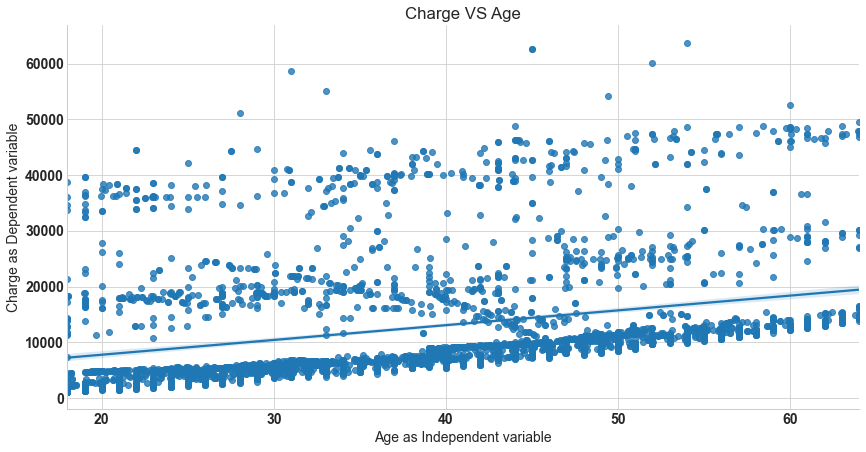

In [15]:
#For first visualization purpose will fit line using seaborn library only for:
#'volatile acidity' as independent variable and 'quality' as dependent variable

sns.lmplot(x='age', y='charges', data=df, aspect=2, height=6)
plt.xlabel('Age as Independent variable')
plt.ylabel('Charge as Dependent variable')
plt.title('Charge VS Age')

Text(0.5, 1.0, 'Missing value in the Dataset')

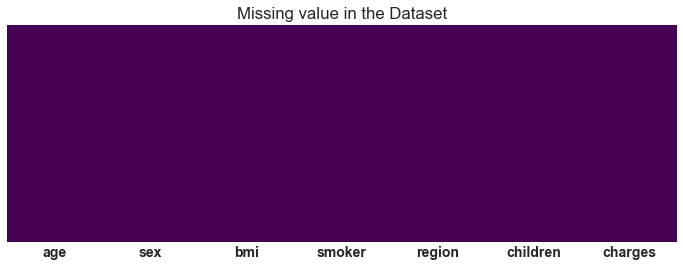

In [16]:
#Check for missing value

plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing value in the Dataset')

There is no missing data.

<AxesSubplot:>

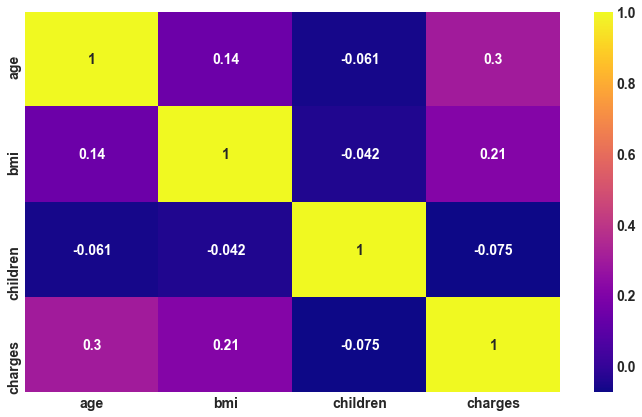

In [18]:
# correlation plot
plt.figure(figsize=(12,7))
corr = df.corr()
sns.heatmap(corr, cmap='plasma', annot=True)

There is no correlation among independent variables

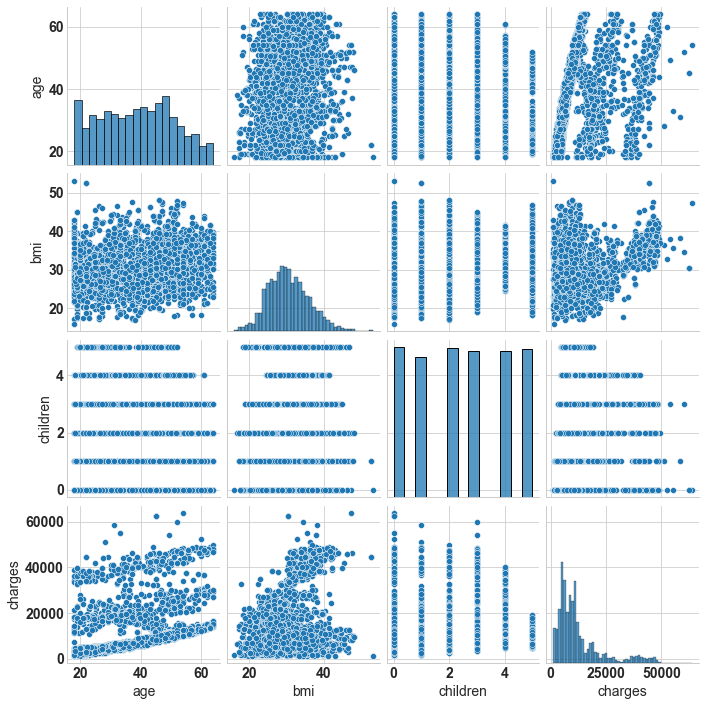

In [20]:
# EDA

sns.pairplot(df)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


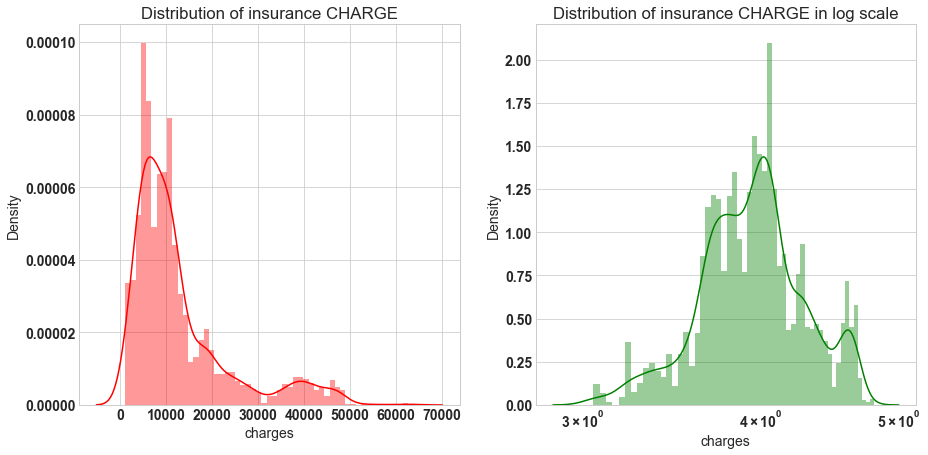

In [37]:
f = plt.figure(figsize=(15,7))

ax=f.add_subplot(121)
sns.distplot(df['charges'], bins=55, color='r', ax=ax)
ax.set_title('Distribution of insurance CHARGE')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']), bins=55, color='g', ax=ax)
ax.set_title('Distribution of insurance CHARGE in log scale')
ax.set_xscale('log')

On the left plot skew is to the right. On the right plot natural log is applied and plot tends to normal.

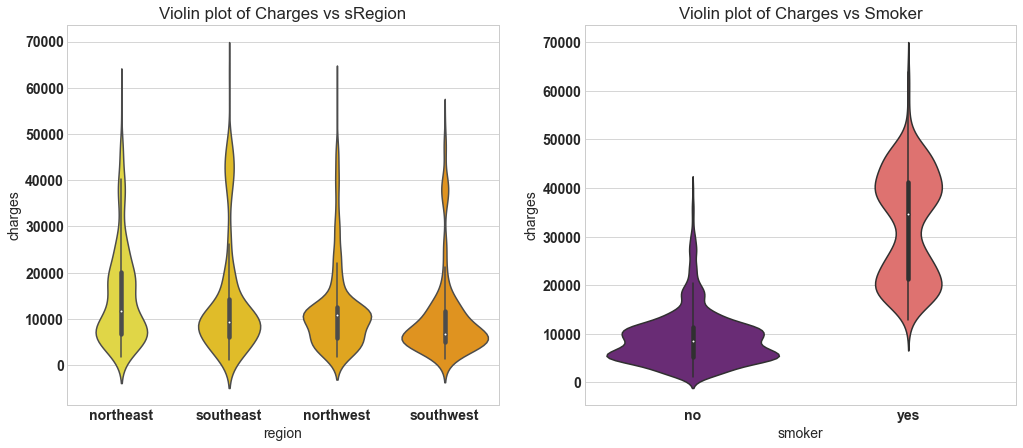

In [45]:
f = plt.figure(figsize=(17,7))
ax = f.add_subplot(121)
sns.violinplot(x='region', y='charges',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sRegion')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs Smoker');


The smallest range of insurance charges is in SouthWest region and it has the lowest average (around 5000).

The highest range og charges is in SouthEast region, but the highest average charge is in NorthWest region (around 11000).

The average charge for non-smokers is around 5000 and for smokers it's the min insurance charge.

Text(0.5, 1.0, 'Violin plot of Charges vs Smokers')

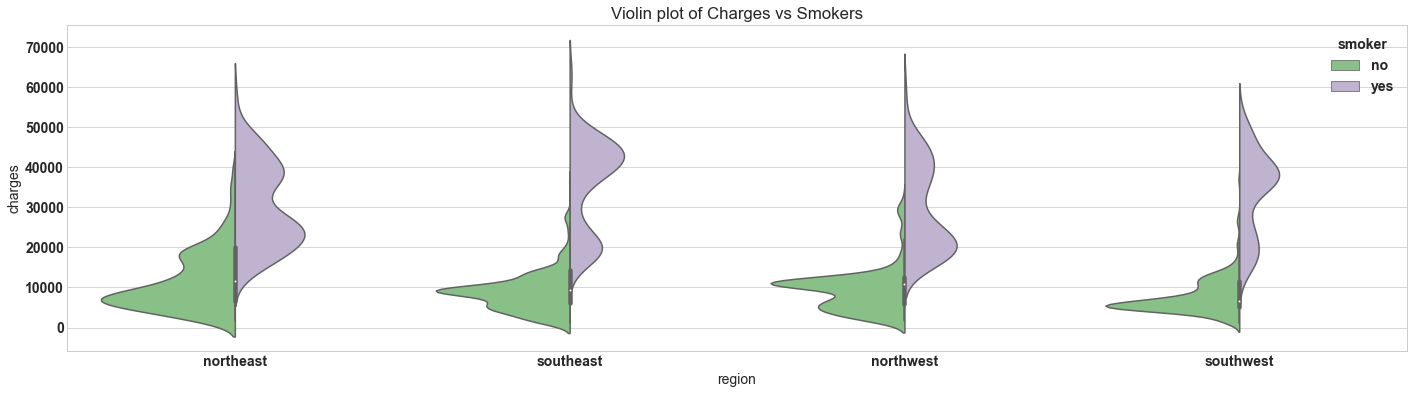

In [55]:

plt.figure(figsize=(24,6))
sns.violinplot(x='region', y='charges', hue='smoker', data=df, palette='Accent', split=True)
plt.title('Violin plot of Charges vs Smokers')

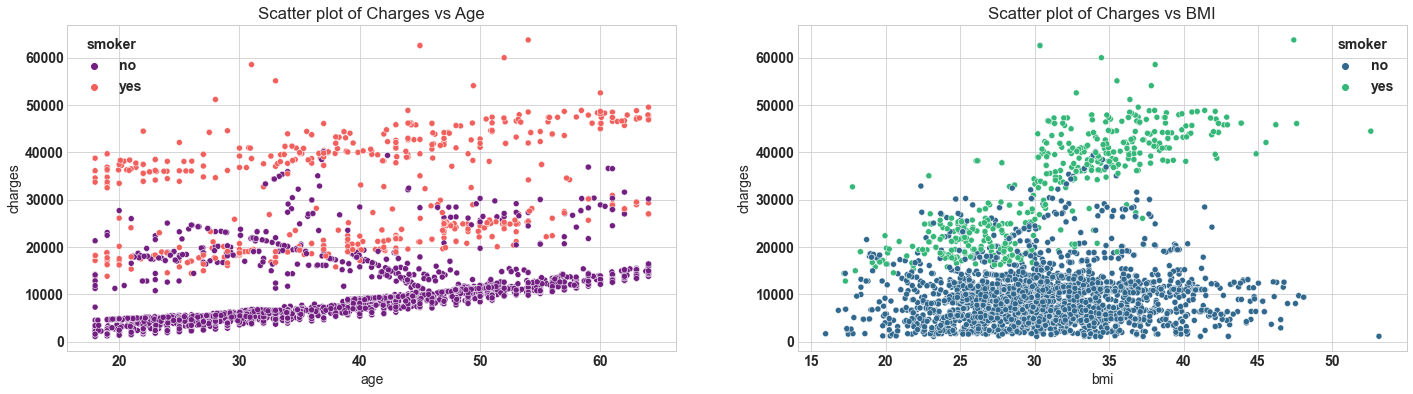

In [57]:
f = plt.figure(figsize=(24,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs Age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs BMI')
plt.savefig('sc.png')

On the left plot, there are three groups presented: the first one is non-smokers, 
the second is mixed with smokers and non-smokers, the third consists of smokers mostly.
There is a trend for non-smokers on the right plot - the higher BMI higher charges.

ML algorithms cannot work with categorical data directly, categorical data should be converted to numbers

Encoding

In [25]:
categorical_columns = ['sex', 'smoker', 'region', 'children']
df_encode = pd.get_dummies(data=df, prefix='ENC', prefix_sep='_',
                           columns=categorical_columns,
                           drop_first=True,
                           dtype='int8')

In [26]:
df_encode.head()

,age,bmi,charges,ENC_male,ENC_yes,ENC_northwest,ENC_southeast,ENC_southwest,ENC_1,ENC_2,ENC_3,ENC_4,ENC_5
0,21.000000,25.745000,3279.868550,1,0,0,0,0,0,1,0,0,0
1,36.976978,25.744165,21454.494239,0,1,0,1,0,0,0,1,0,0
2,18.000000,30.030000,1720.353700,1,0,0,1,0,1,0,0,0,0
3,37.000000,30.676891,6801.437542,1,0,0,0,0,0,0,1,0,0
4,58.000000,32.010000,11946.625900,1,0,0,1,0,1,0,0,0,0


Box -Cox transformation

A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. 

Normality is an important assumption for many statistical techniques; 

if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests.

In [27]:
from scipy.stats import boxcox
y_bc,lam, ci= boxcox(df_encode['charges'],alpha=0.05)

ci,lam

((-0.057997550454087055, 0.012454875176093533), -0.02282611647381756)

In [28]:
df_encode['charges'] =np.log(df_encode['charges'])

Determine the Features and Label

In [29]:
from sklearn.model_selection import train_test_split
X = df_encode.drop('charges', axis = 1) # Independent variable
y = df_encode['charges'] #Dependent variable

Split the Dataset to Train and Test

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=23)

In [31]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [32]:
pd.DataFrame(model.coef_, X.columns, columns=['coeficient'])

,coeficient
age,0.031505
bmi,0.007547
ENC_male,0.036040
ENC_yes,1.441286
ENC_northwest,-0.211488
ENC_southeast,-0.219827
ENC_southwest,-0.219093
ENC_1,0.140185
ENC_2,0.259225
ENC_3,0.262606


Model building

In [58]:
# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train))

In [59]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [60]:
# Scikit Learn model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,7.350047,7.350047
1,theta_1,age,0.031505,0.031505
2,theta_2,bmi,0.007547,0.007547
3,theta_3,ENC_male,0.036040,0.036040
4,theta_4,ENC_yes,1.441286,1.441286
5,theta_5,ENC_northwest,-0.211488,-0.211488
6,theta_6,ENC_southeast,-0.219827,-0.219827
7,theta_7,ENC_southwest,-0.219093,-0.219093
8,theta_8,ENC_1,0.140185,0.140185
9,theta_9,ENC_2,0.259225,0.259225


The parameters obtained in both models are the same. It means that the model is successfully build by applying normal equation 

and verified using sklearn regression module.

In [61]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  0.1509358293811837
R square obtain for normal equation method is : 0.741347153122049


In [62]:
#The smaller MSE, the closer you are to find the line of best fit.
#R_square is always between 0 to 100%. 0% indicated that model explains none of the variability of the response data around it's mean. 
#100% indicated that model explains all the variablity of the response data around the mean.
#R square returns 74.13% and it quite good, but still can be improved.

In [65]:
y_pred_sk = lin_reg.predict(X_test)

from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

R_square_sk = lin_reg.score(X_test, y_test)

print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for normal equation method is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  0.15093582938118483
R square obtain for normal equation method is : 0.7413471531220471


Model validation

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Check for Residual normality & mean: \n Residual error')

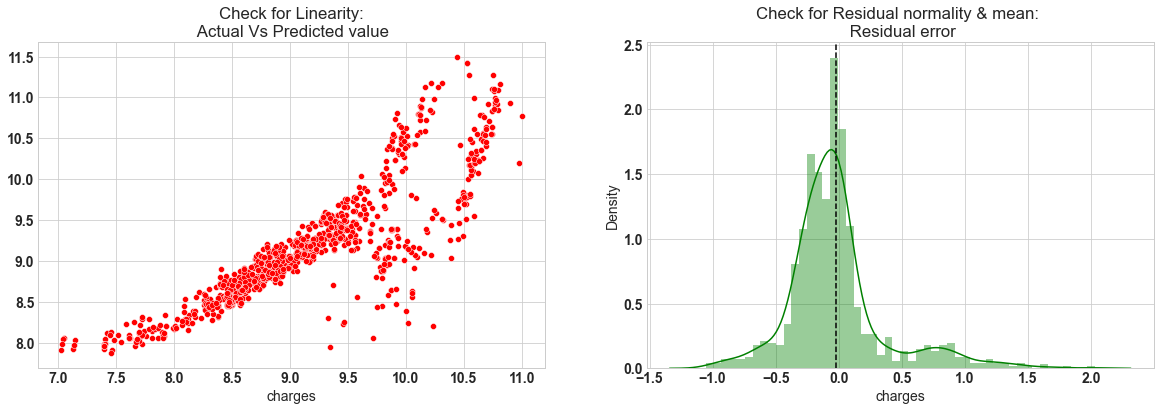

In [71]:
# Check for Linearity

f = plt.figure(figsize=(20,6))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred_sk,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='g')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual error')

There is a curve in the Actual vs Predicted plot, it means that linear assumption fails.

The Residual error is zero and the plot is right skewed.

Text(0.5, 1.0, 'Check for Homoscedasticity: \nResidual Vs Predicted')

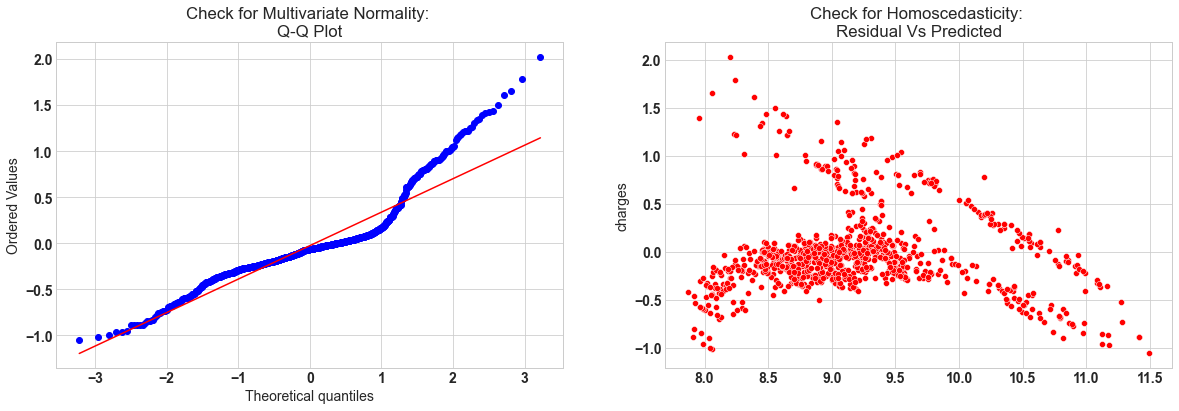

In [70]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(20,6))

_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted')

Q-Q test shows that not all data points are on the line and it indicates of non-normality, specially after 1.4

In [80]:
#WHITE TEST

model = sm.OLS(y,x).fit()

white_test = het_white(model.resid,  model.model.exog)

In [82]:
#define labels to use for output of White's test
labels = ['Lagrange multiplier Statistic', 'Test Statistic p-value', 'F-Statistic f-value', 'F-Test p-value']

#print results of White's test
lzip(labels, white_test)

[('Lagrange multiplier Statistic', 1000.4561211412729),
 ('Test Statistic p-value', 1.3746772441743465e-209),
 ('F-Statistic f-value', 153.03250404626044),
 ('F-Test p-value', 8.588557802226691e-246)]

Since the p-value is not less than 0.05, we fail to reject the null hypothesis.

This means we do not have sufficient evidence to say that heteroscedasticity is present in the regression model.

In [83]:
X = sm.add_constant(X)

model = sm.OLS(y,X)

results = model.fit()

In [85]:
results.pvalues

const             0.000000e+00
age               0.000000e+00
bmi               6.530851e-09
ENC_male          2.409203e-03
ENC_yes           0.000000e+00
ENC_northwest     2.177744e-26
ENC_southeast     2.021831e-24
ENC_southwest     5.795071e-25
ENC_1             1.049743e-09
ENC_2             3.484199e-35
ENC_3             8.559304e-32
ENC_4            4.168964e-134
ENC_5             6.961083e-77
dtype: float64

In [87]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     832.2
Date:                Mon, 17 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:38:04   Log-Likelihood:                -1766.2
No. Observations:                3630   AIC:                             3558.
Df Residuals:                    3617   BIC:                             3639.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.3560      0.046    160.323      0.000       7.266       7.446
age               0.0312      0.001     55.887      0.000       0.030       0.032
bmi               0.0072      0.001      5.816      0.000       0.005       0.010
ENC_male          0.0421      0.014      3.037      0.002       0.015       0.069
ENC_yes           1.4162      0.019     74.349      0.000       1.379       1.454
ENC_northwest    -0.2056      0.019    -10.714      0.000      -0.243      -0.168
ENC_southeast    -0.1984      0.019    -10.273      0.000      -0.236      -0.161
ENC_southwest    -0.2063      0.020    -10.396      0.000      -0.245      -0.167
ENC_1             0.1397      0.023      6.118      0.000       0.095       0.185
ENC_2             0.2813      0.022     12.510      0.000       0.237       0.325
ENC_3             0.2691      0.023     11.847      0.000       0.225       0.314
ENC_4             0.5919      0.023     25.719      0.000       0.547       0.637
ENC_5             0.4584      0.024     19.011      0.000       0.411       0.506
==============================================================================
Omnibus:                      979.876   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2836.730
Skew:                           1.400   Prob(JB):                         0.00
Kurtosis:                       6.304   Cond. No.                         385.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""